In [4]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../Dataset'))
sys.path.append(os.path.abspath('..'))

import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from func_preprocesamiento import preprocesar

In [5]:
alquileres_df = pd.read_csv('../Dataset/raw/dev.csv')

delitos_df = pd.read_csv('../Dataset/Extra_delitos/delitos_2021.csv')

/tmp/ipykernel_40171/840573492.py:1: DtypeWarning: Columns (8,33) have mixed types. Specify dtype option on import or set low_memory=False.
  alquileres_df = pd.read_csv('../Dataset/raw/dev.csv')


In [6]:
import pandas as pd

barrios_a_comunas = {
    'Retiro': 1, 'San Nicolás': 1, 'Puerto Madero': 1, 'San Telmo': 1, 'Montserrat': 1, 'Constitución': 1,
    'Recoleta': 2,
    'Balvanera': 3, 'San Cristóbal': 3,
    'La Boca': 4, 'Barracas': 4, 'Parque Patricios': 4, 'Nueva Pompeya': 4,
    'Almagro': 5, 'Boedo': 5,
    'Caballito': 6,
    'Flores': 7, 'Parque Chacabuco': 7,
    'Villa Soldati': 8, 'Villa Riachuelo': 8, 'Villa Lugano': 8,
    'Liniers': 9, 'Mataderos': 9, 'Parque Avellaneda': 9,
    'Villa Real': 10, 'Monte Castro': 10, 'Versalles': 10, 'Floresta': 10, 'Vélez Sarsfield': 10, 'Villa Luro': 10,
    'Villa General Mitre': 11, 'Villa Devoto': 11, 'Villa del Parque': 11, 'Villa Santa Rita': 11,
    'Coghlan': 12, 'Saavedra': 12, 'Villa Urquiza': 12, 'Villa Pueyrredón': 12,
    'Núñez': 13, 'Belgrano': 13, 'Colegiales': 13,
    'Palermo': 14,
    'Chacarita': 15, 'Villa Crespo': 15, 'La Paternal': 15, 'Villa Ortúzar': 15, 'Agronomía': 15, 'Parque Chas': 15
}

# Filtrar el DataFrame para incluir solo los barrios que están en el diccionario
alquileres_df = alquileres_df[alquileres_df['ITE_ADD_NEIGHBORHOOD_NAME'].isin(barrios_a_comunas.keys())]

# Crear la nueva columna 'comuna' usando el diccionario
alquileres_df['comuna'] = alquileres_df['ITE_ADD_NEIGHBORHOOD_NAME'].map(barrios_a_comunas)

alquileres_df = alquileres_df[['comuna', 'precio_pesos_constantes']]

# alquileres_df = preprocesar(alquileres_df, 'train', ['comuna'])
# alquileres_df.to_csv('../Dataset/preprocessed/dev.csv', index=False)
# # Mostrar los primeros resultados para verificar
# print(alquileres_df.head())


In [7]:
delitos_df = pd.read_csv('../Dataset/Extra_delitos/delitos_2021.csv')
delitos_df = delitos_df[['comuna', 'latitud', 'longitud']]
delitos_df = delitos_df.dropna()
delitos_df['comuna'] = delitos_df['comuna'].astype(int)
print(delitos_df.head())

   comuna    latitud   longitud
0      10 -34.631129 -58.489377
1      10 -34.624628 -58.501039
2      10 -34.623213 -58.510132
3      10 -34.627172 -58.498928
4      10 -34.626978 -58.483313


In [ ]:
# Contar el número de delitos por comuna y crear un DataFrame
delitos_por_comuna = delitos_df['comuna'].value_counts().reset_index()
delitos_por_comuna.columns = ['comuna', 'num_delitos']

# Convertir el DataFrame a un diccionario
delitos_por_comuna_dict = delitos_por_comuna.set_index('comuna')['num_delitos'].to_dict()

# Mostrar el diccionario resultante
print(delitos_por_comuna_dict.items())

    comuna  num_delitos
0        1        12658
1        4        10854
2        3         9275
3       14         8881
4        7         8365
5        8         8152
6       13         6540
7        9         6507
8       15         6245
9        5         5977
10      12         5723
11      10         5239
12       2         5161
13      11         4910
14       6         4891
dict_items([(1, 12658), (4, 10854), (3, 9275), (14, 8881), (7, 8365), (8, 8152), (13, 6540), (9, 6507), (15, 6245), (5, 5977), (12, 5723), (10, 5239), (2, 5161), (11, 4910), (6, 4891)])


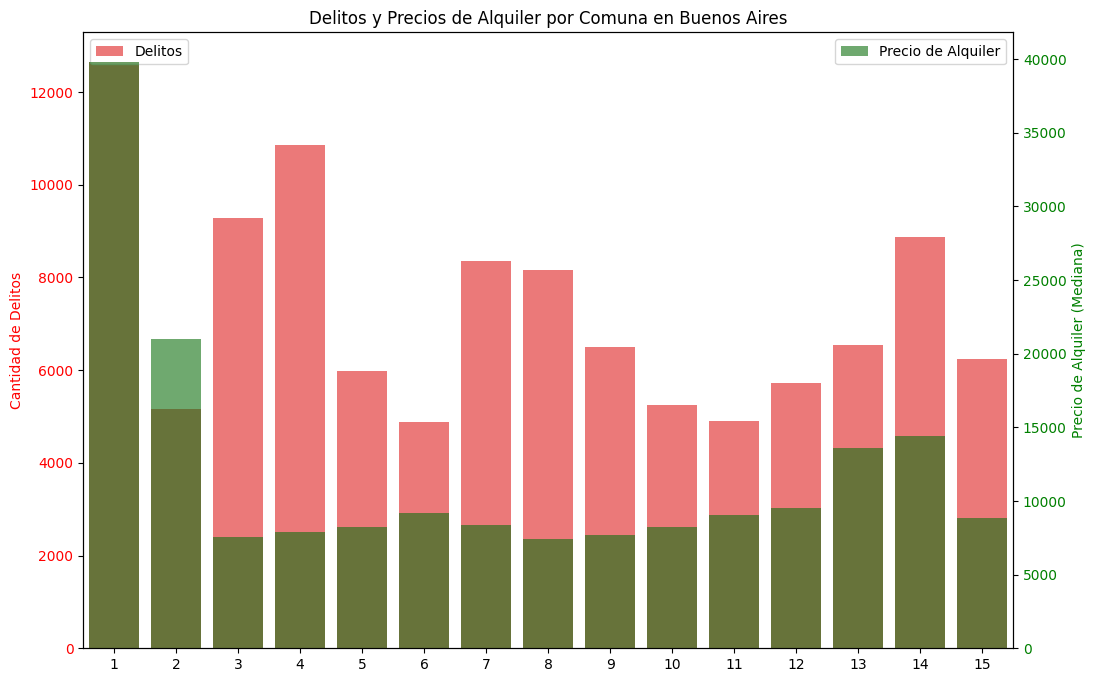

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que delitos_por_comuna es tu diccionario
# Calcular la mediana de los precios por comuna
precio_por_comuna = alquileres_df.groupby('comuna')['precio_pesos_constantes'].median().reset_index()

# Extraer las comunas y los delitos del diccionario
comunas = list(delitos_por_comuna_dict.keys())
delitos = list(delitos_por_comuna_dict.values())

# Extraer los precios de alquiler correspondientes a las comunas
precios = [precio_por_comuna.loc[precio_por_comuna['comuna'] == comuna, 'precio_pesos_constantes'].values[0] for comuna in comunas]

# Configuración de las gráficas
fig, ax1 = plt.subplots(figsize=(12, 8))

# Gráfica de barras para los delitos con transparencia
ax1 = sns.barplot(x=comunas, y=delitos, color='red', label='Delitos', alpha=0.6)
ax1.set_ylabel('Cantidad de Delitos', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Crear un segundo eje y para los precios con transparencia
ax2 = ax1.twinx()
ax2 = sns.barplot(x=comunas, y=precios, color='green', label='Precio de Alquiler', alpha=0.6)
ax2.set_ylabel('Precio de Alquiler (Mediana)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Añadir títulos y leyendas
plt.title('Delitos y Precios de Alquiler por Comuna en Buenos Aires')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.show()


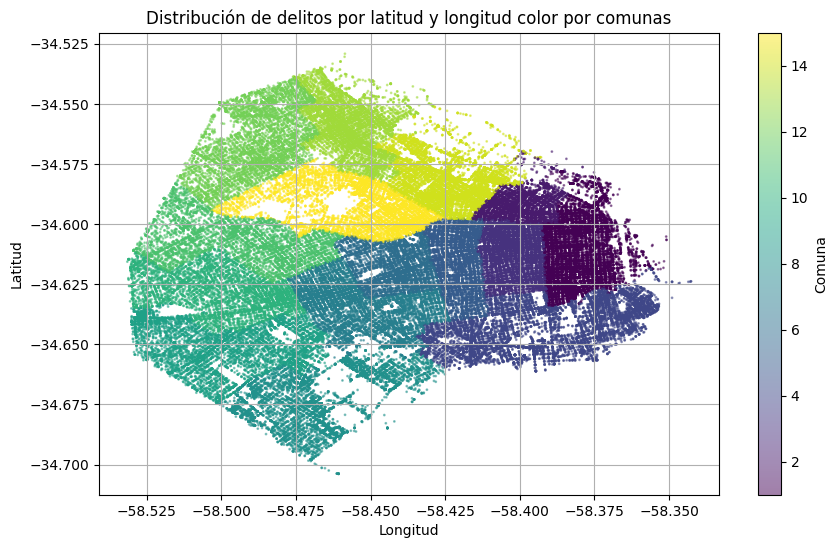

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(delitos_df['longitud'], delitos_df['latitud'], c=delitos_df['comuna'], alpha=0.5, s=1, cmap='viridis')
plt.title('Distribución de delitos por latitud y longitud color por comunas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar(label='Comuna')
plt.grid(True)
plt.show()

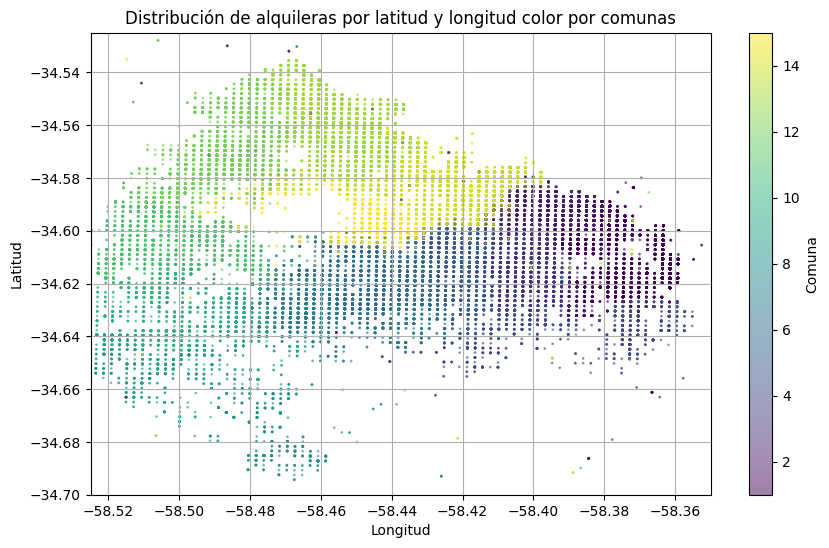

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(alquileres_df['LONGITUDE'], alquileres_df['LATITUDE'], c=alquileres_df['comuna'], alpha=0.5, s=1, cmap='viridis')
plt.title('Distribución de alquileras por latitud y longitud color por comunas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.xlim(-58.525, -58.35)
plt.ylim(-34.7, -34.525)
plt.colorbar(label='Comuna')
plt.grid(True)
plt.show()

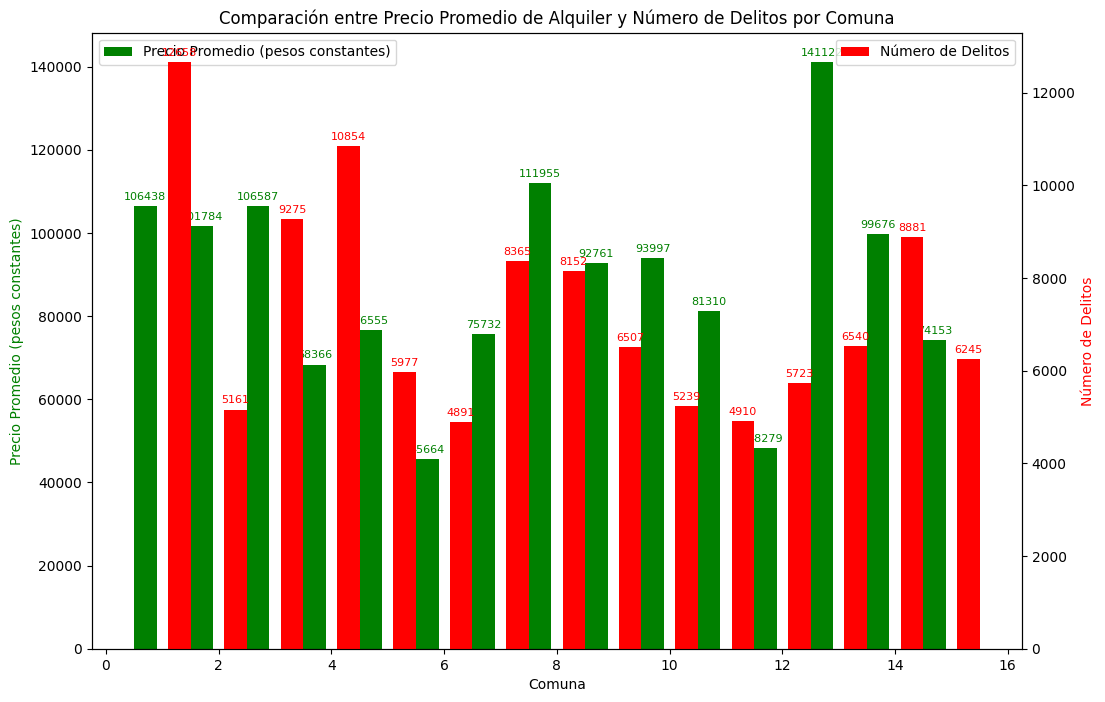

In [ ]:
# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 8))

# Crear la primera barra para el precio de alquiler en verde
bar1 = ax1.bar(relacion_precio_delito['comuna'] - 0.3, relacion_precio_delito['precio_pesos_constantes'], width=0.4, label='Precio Promedio (pesos constantes)', color='g', align='center')

# Crear un segundo eje y para la cantidad de delitos en rojo
ax2 = ax1.twinx()
bar2 = ax2.bar(relacion_precio_delito['comuna'] + 0.3, relacion_precio_delito['num_delitos'], width=0.4, label='Número de Delitos', color='r', align='center')

# Etiquetas y título
ax1.set_xlabel('Comuna')
ax1.set_ylabel('Precio Promedio (pesos constantes)', color='g')
ax2.set_ylabel('Número de Delitos', color='r')
plt.title('Comparación entre Precio Promedio de Alquiler y Número de Delitos por Comuna')

# Agregar etiquetas a las barras
for bar in bar1:
    height = bar.get_height()
    ax1.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=8, color='g')

for bar in bar2:
    height = bar.get_height()
    ax2.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=8, color='r')

# Mostrar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()
